# docker——基本知识

docker相当于起到了承上启下的桥梁作用：将App连带环境一同打包直接部署到服务器上
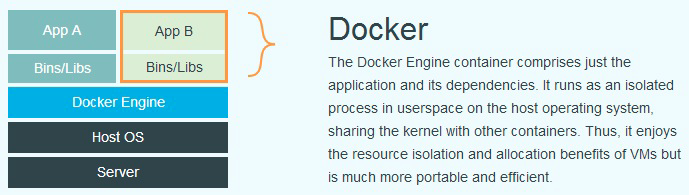

传统的虚拟机是在宿主机之上，又添加了一个新的操作系统，这就直接导致了虚拟机的臃肿与不适合迁移

Docker直接寄存在宿主机上，完全就会避免大部分虚拟机带来的困扰; Docker可以独立出一个自己的空间，不会使得在docker中的行为以及变量溢出到宿主机上。

### 为什么用docker
在没出现docker的时候，得在服务器中配置各种各样的参数;

使用docker, 可以使用已经build好的镜像。而且在项目需要迁移的时候，我们只需要在需要部署的地方，直接使用之前项目使用的docker放置好自己的项目即可，方便快捷。
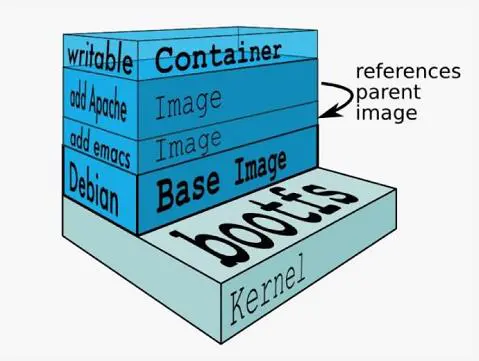



### docker底层技术支持
- NameSpaces：用于做进程之间的隔离
- Control Groups： 用于做资源控制，根据需求划分资源的核心数，内存，硬盘等等，和新建一个虚拟机一样
- Union file systems（UFS，联合文件系统）：Container和image的分层

#### 镜像的分层结构
为什么要采用分层的结构，其中之一的好处就是：共享资源。
有多个镜像都从相同的base镜像构建而来，那么Docker host只需要在磁盘上保存一份base镜像，同时在内存种也只需要加载一份base镜像，就可以为所有的镜像服务。而且，镜像的每一层都可以被共享。

如果多个容器共享一份基础镜像，当某个容器修改了基础镜像的内容，那么会影响到其他的容器吗？
答案是不会，因为容器利用了copy-on-write技术。当容器启动时，一个新的可写层会被加载到镜像的顶部。这一层叫做"容器层"，"容器层"之下都称作镜像层。

所有对容器的改动都只会发生在容器层，只有容器层是可写的，容器层下面都是可读的。


### docker的基本概念
docker最重要的三个概念是：镜像（image），容器（container），仓库（repository），镜像是最重要的概念。

#### 1.镜像
- 镜像是文件与meta data的集合
- 分层，并且每一层都可以添加删除文件，从而形成新的镜像
- 不同的镜像可以共享相同的层（layout）
- 只读

镜像我们可以理解为树状结构，每一个镜像都会依赖于另一个镜像，这个依赖关系是体现在docker镜像制作的dockerfile中的FROM指令中的。
##### base 镜像
base镜像又2层含义：

不依赖其他镜像，从stratch构建
其他镜像可以已之为基础进行扩展
base镜像一般是各种linux发行版，比如Ubuntu，centos。

#### 2.容器
- 通过image创建
- 在image 的最后一层上面再添加一层，这一层比较特殊，可读写。
- image负责存储和分发，container负责运行
容器是镜像的一个运行实例，可以不准确的把镜像当作类，容器当作对象。

容器的结构是与镜像相类似的，底部也是一层层的只读层，不同在于最上层会存在一个存储层，我们可以在这一层定制化我们的这个容器，还可以通过build命令，把容器打包成我们自己需要的镜像。

另外镜像启动后会形成一个容器，容器在计算机中是一个进程，但这个进程对其他进程并不可见。

**容器的启动过程：**
检查镜像是否在本地存在，如果不存在去远程仓库下载

==>利用镜像创建一个容器

==>启动刚刚创建的容器

==>分配一个文件系统给容器，并且在镜像层外挂载一个可读可写层

==>从宿主主机的网桥接口中桥接一个给容器

==>从网桥中分一个ip地址给容器

==>执行用户指定的应用程序

==>执行完毕后容器自动终止

#### 3.仓库
类似于git

 - docker search <镜像名称>
 - docker pull <镜像名称>：<镜像版本>
 - docker run -d -p <外部端口>:<内部端口> <镜像名称>：<镜像的tag>
   外部端口指的就是宿主电脑的端口
 - docker create --name <容器名称> <镜像名称>：<镜像tag>
 - docker start <容器的id>
 - docker images (docker image ls)  # 查看本地已经有的docker镜像
 - docker rmi <容器名称>：<容器tag>
 - docker ps -a   # 查看所有的容器
 - docker tag <已有镜像名>：<已有镜像版本> <新镜像名>:<新镜像版本>   
 
   新生成一个镜像
 - docker inspect <镜像名称>:<镜像版本>  
 
   显示镜像的详细信息
 - docker commit <进程号>/<容器名称> <镜像名称>：<版本号>
 
   基于现有镜像，形成自己的镜像
   
   形成新的自己的镜像，一共有三个方法：
   - 通过 commit 命令
   - 通过模版进行构建
   - 通过Dockerfile文件进行构建
   
   docker commit 需要慎用，会使得镜像越来越臃肿。
 - docker save -o 导出的镜像名称（后缀为.tar） <镜像名称>:<镜像的版本>
 - docker load --input 导出的镜像名称(后缀为.tar)
 
   上面两个命令是搭配在一起的，我们通过save命令，把镜像打包成tar文件的形式，这就可以分享给别人进行使用，然后其他人可以通过 load 命令将 导出的文件，保存到本地
  
 - docker export -o 导出的镜像名称（后缀为.tar） <容器Id>
 - docker import 导出的镜像名称(后缀为.tar) <镜像名称>:<镜像的版本>
 
  这两个命令也是搭配起来的将正在运行的容器，打包成一个tar文件。然后把tar文件import进来，形成一个镜像
  
  - load 命令导入镜像存储文件到本地镜像库
  - import 导入一个容器快照到本地镜像库

     容器快照文件将丢弃所有的历史记录以及元数据信息，仅保留快照时的状态
     
  - docker stop <容器的ID>
  
    停止正在运行的容器实例

  - docker rm <容器的ID>
  
    在删除一个容器实例之前，应该先要将容器停止
  
  - docker restart <容器的ID>
    重新启动容器，将容器先停止，后启动。

  - docker build -t <生成镜像的名称>：<镜像的版本>
    这是三种创建自己镜像中最好的一种方法，很多时候我们看到Dockerfile的位置上为".",表示的是当前目录

In [3]:
!docker search tomcat
!docker run -d -p 8080:8080 tomcat 

Got permission denied while trying to connect to the Docker daemon socket at unix:///var/run/docker.sock: Get http://%2Fvar%2Frun%2Fdocker.sock/v1.24/images/search?limit=25&term=tomcat: dial unix /var/run/docker.sock: connect: permission denied
docker: Got permission denied while trying to connect to the Docker daemon socket at unix:///var/run/docker.sock: Post http://%2Fvar%2Frun%2Fdocker.sock/v1.24/containers/create: dial unix /var/run/docker.sock: connect: permission denied.
See 'docker run --help'.


## Docker 镜像基本操作
Docker 镜像最常用的三个基本操作 pull、run、push

通过认识镜像的基本操作，可以更熟练地使用容器镜像服务 ACR。

### 1.获取镜像的命令：docker pull
```
docker pull [选项] [Docker Registry 地址[:端口]/]仓库名[:标签]
```
- Docker 镜像仓库地址：地址的格式一般是 <域名/IP>[:端口号]，默认地址是 Docker Hub。
- 仓库名：这里的仓库名是两段式名称，即 <用户名>/<软件名>。对于 Docker Hub，如果不给出用户名，则默认为 library，也就是官方镜像。比如：
```
docker pull ubuntu:16.04
```

### 2. 运行 docker run
如果我们打算启动 ubuntu:16.04 的 bash 并且进行交互式操作: 
```
docker run -it --rm \
    ubuntu:16.04 \
    /bin/bash
``` 
    
- -it：这是两个参数，一个是 -i：交互式操作，一个是 -t 终端。我们这里打算进入 bash 执行一些命令并查看返回结果，因此我们需要交互式终端。
- --rm：这个参数是说容器退出后随之将其删除。默认情况下，为了排障需求，退出的容器并不会立即删除，除非手动 docker rm
- ubuntu:16.04：这是指用 ubuntu:16.04 镜像为基础来启动容器。
- bash：放在镜像名后的是命令，这里我们希望有个交互式 Shell，因此用的是 bash。

通过 exit 退出容器。

#### 新建并启动
```
docker run ubuntu:16.04 /bin/echo 'Hello world'
```
允许用户进行交互
```
docker run -t -i ubuntu:16.04 /bin/bash
```

#### 启动已终止容器
```
docker container start
```
#### 后台运行
添加-d参数
#### 终止容器
```
docker container stop
```
用户通过 exit 命令或 Ctrl+d 来退出终端时，所创建的容器立刻终止

终止状态的容器可以用`docker container ls -a`命令看到

#### 进入容器
```
docker run -dit ubuntu:16.04
docker container ls
ocker exec -i 69d1 bash
docker exec -it 69d1 bash
```
如果从这个 stdin 中 exit，不会导致容器的停止。这就是为什么推荐大家使用docker exec的原因


`docker image ls`列表中的镜像体积总和并非是所有镜像实际硬盘消耗。

由于 Docker 镜像是多层存储结构，并且可以继承、复用，因此不同镜像可能会因为使用相同的基础镜像，从而拥有共同的层。

由于 Docker 使用Union FS，相同的层只需要保存一份即可，

此实际镜像硬盘占用空间很可能要比这个列表镜像大小的总和要小的多。

##  Docker  Aliyun 操作指南

### 1.docker login
指明 Registry 域名，并输入您的用户名和登录密码。

登录成功之后会显示 Login Succeeded

```
 docker login registry.cn-hangzhou.aliyuncs.com
```
以上 `registry ....` 为实例， 添加自己的镜像公有网络， 如`registry.cn-hangzhou.aliyuncs.com/<命名空间>/<镜像仓库>`
或者
```
sudo docker login --username=<用户名> registry.cn-hangzhou.aliyuncs.com
```

为简化构建镜像的难度，天池已准备了常用的Python基础镜像，可直接拉取使用
```
docker pull registry.cn-shanghai.aliyuncs.com/tcc-public/python:3
```

###  2.从Registry中拉取镜像
```
sudo docker pull registry.cn-hangzhou.aliyuncs.com/<命名空间>/<镜像仓库>:[镜像版本号]
```

### 3.将镜像推送到Registry
```
sudo docker tag [ImageId] registry.cn-hangzhou.aliyuncs.com/<命名空间>/<镜像仓库>:[镜像版本号]
sudo docker push registry.cn-hangzhou.aliyuncs.com/<命名空间>/<镜像仓库>:[镜像版本号]
```

### 4. 选择合适的镜像仓库地址
从ECS推送镜像时，可以选择使用镜像仓库内网地址。推送速度将得到提升并且将不会损耗您的公网流量。

如果使用的机器位于VPC网络，请使用 registry-vpc.cn-hangzhou.aliyuncs.com 作为Registry的域名登录。

### 5. 示例
使用"docker tag"命令重命名镜像，并将它通过专有网络地址推送至Registry。

```
$ sudo docker images
REPOSITORY                                                         TAG                 IMAGE ID            CREATED             VIRTUAL SIZE
registry.aliyuncs.com/acs/agent                                    0.7-dfb6816         37bb9c63c8b2        7 days ago          37.89 MB
$ sudo docker tag 37bb9c63c8b2 registry-vpc.cn-hangzhou.aliyuncs.com/acs/agent:0.7-dfb6816
```

使用 "docker push" 命令将该镜像推送至远程

```
sudo docker push registry-vpc.cn-hangzhou.aliyuncs.com/acs/agent:0.7-dfb6816
```


### Dockerfile
#### Dockerfile 中的常用命令
- `FROM`

    Dockerfile文件的第一条指令必须是`FROM`，其后可以是各种镜像的操作指令，最后是`CMD`或`ENTRYPOINT`指定容器启动时执行的命令。

- `MAINTAINER`

- `CMD` 和 `ENTRYPOINT`

    CMD指令和ENTRYPOINT指令的作用都是为镜像指定容器启动后的命令。

    - `CMD`
    支持三种格式：

    1. `CMD ["executable", "param1", "param2"]` 使用 exec 执行，推荐方式。
    2. `CMD command param1 param2` 在 /bin/sh 中执行，提供给需要交互的应用。
    3. `CMD ["param1", "param2"]` 提供给 ENTRYPOINT 的默认参数。
    启动容器时执行的命令，每个 Dockerfile 只能有一条 CMD 命令，如果指定了多条命令，只有最后一条会被执行。
    
    如果用户启动容器时候指定了运行的命令，则会覆盖掉 CMD 指定的命令。

    - `ENTRYPOINT`
    支持两种格式：

    1. `ENTRYPOINT ["executable", "param1", "param2"]`
    2. `ENTRYPOINT command param1 param2`（shell中执行）
   
   配置容器启动后执行的命令，并且不可被 docker run 提供的参数覆盖，而是将docker run指定的参数当做ENTRYPOINT指定命令的参数。
    每个 Dockerfile 中只能有一个 ENTRYPOINT，当指定多个时，只有最后一个起效。


#### Tests
##### Test 1
- `test.sh`
  ```shell
  #!/bin/bash
echo "args: ${@}"
  ```
  
- Dockerfile
 ```Dockerfile
 FROM ubuntu
MAINTAINER 123@123.com
ADD test.sh /
RUN chmod +x /test.sh
CMD ["/test.sh"]
 ```
 
 - Test Result
 ```
 # docker build -t=test1:latest .
# docker run --rm -ti test1
  args:  
# docker run --rm -ti test1 /bin/bash -c "echo hello world"
  hello world
 ```
 
可见docker run命令启动容器时指定的运行命令可以覆盖Dockerfile文件中CMD指令指定的命令。

- Test2
- Dockerfile
 ```Dockerfile
 FROM ubuntu
MAINTAINER 123@123.com
ADD test.sh /
RUN chmod +x /test.sh
ENTRYPOINT ["/test.sh"]
 ```
 
- Test Result
 ```
# docker build -t=test2:latest .
# docker run --rm -ti test2
  args:  
# docker run --rm -ti test2 /bin/bash -c "echo hello world"
  args: /bin/bash -c echo hello world
 ```
 docker run命令指定的容器运行命令不能覆盖Dockerfile文件中ENTRYPOINT指令指定的命令，反而被当做参数传递给ENTRYPOINT指令指定的命令。

注意：

CMD指令为ENTRYPOINT指令提供默认参数是基于镜像层次结构生效的，而不是基于是否在同个Dockerfile文件中。意思就是说，如果Dockerfile指定基础镜像中是ENTRYPOINT指定的启动命令，则该Dockerfile中的CMD依然是为基础镜像中的ENTRYPOINT设置默认参数。
